# Anomaly detection via *Window embedded Isolation Forest*

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from darts.datasets import AirPassengersDataset

RAND = 42
W = 12
CONT = .05

series = AirPassengersDataset().load()

from utils import apply_window_func
from sklearn.ensemble import IsolationForest

def window_fn_score(wnd, t):
	model = IsolationForest(random_state=RAND, contamination=CONT)
	model.fit(X := wnd.reshape(-1, 1))
	return model.decision_function([X[-1]])

def window_fn_predict(wnd, t):
	model = IsolationForest(random_state=RAND, contamination=CONT)
	model.fit(X := wnd.reshape(-1, 1))
	return model.predict([X[-1]])

y_score = apply_window_func(series, W, func=window_fn_score).values().squeeze()
y_hat = apply_window_func(series, W, func=window_fn_predict).values().squeeze()
idx_anomalies = np.argwhere(y_hat == - 1).squeeze()

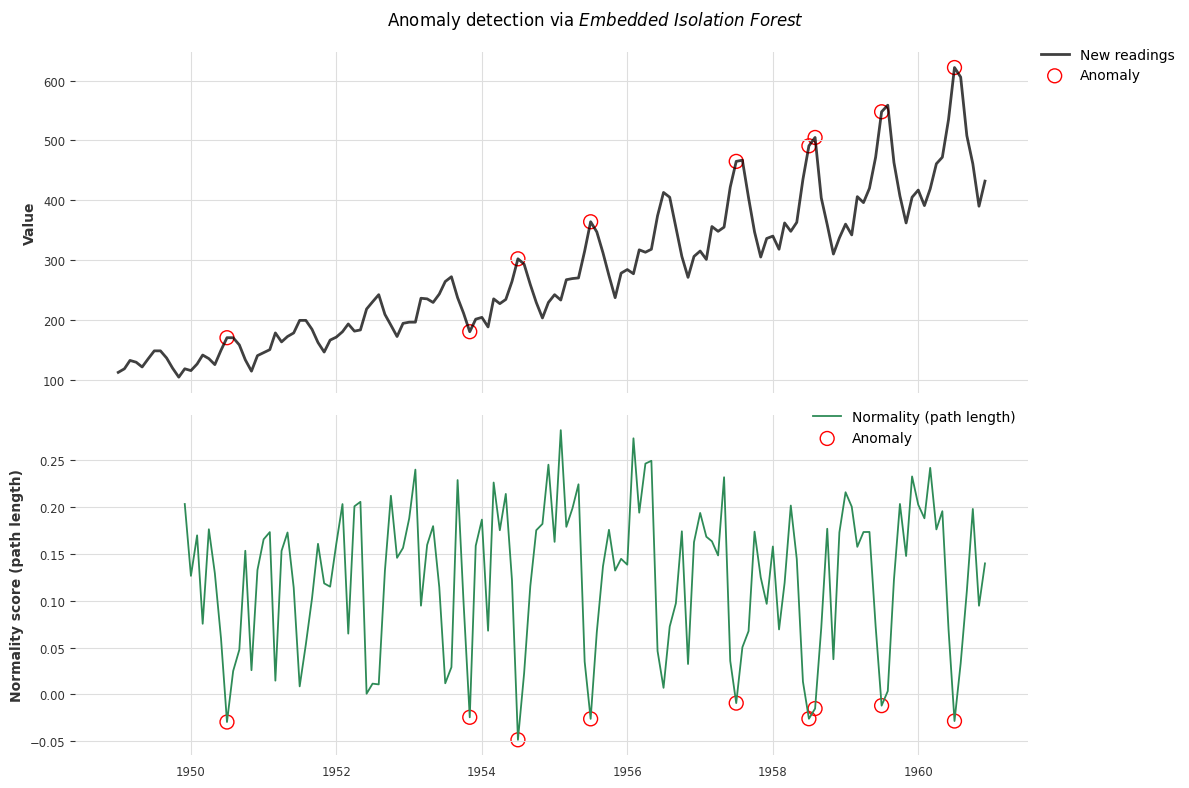

In [4]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
plt.suptitle(f"Anomaly detection via $Embedded \ Isolation \ Forest$")

ax = ax0
series.plot(label="New readings", color="black", alpha=.75, ax=ax)
ax.scatter(series.time_index[idx_anomalies], series.values()[idx_anomalies], color="none", edgecolor="red", s=100, label="Anomaly")

ax.set_xlabel(None)
ax.set_ylabel("Value")
ax.legend(bbox_to_anchor=(1, 1.05))

ax=ax1
ax.plot(series.time_index, y_score, color="seagreen", label=f"Normality (path length)")
ax.scatter(series.time_index[idx_anomalies], y_score[idx_anomalies], color="none", edgecolor="red", s=100, label="Anomaly")

ax.set_ylabel("Normality score (path length)")
ax.legend(bbox_to_anchor=(1, 1.05))

plt.tight_layout()
plt.show()